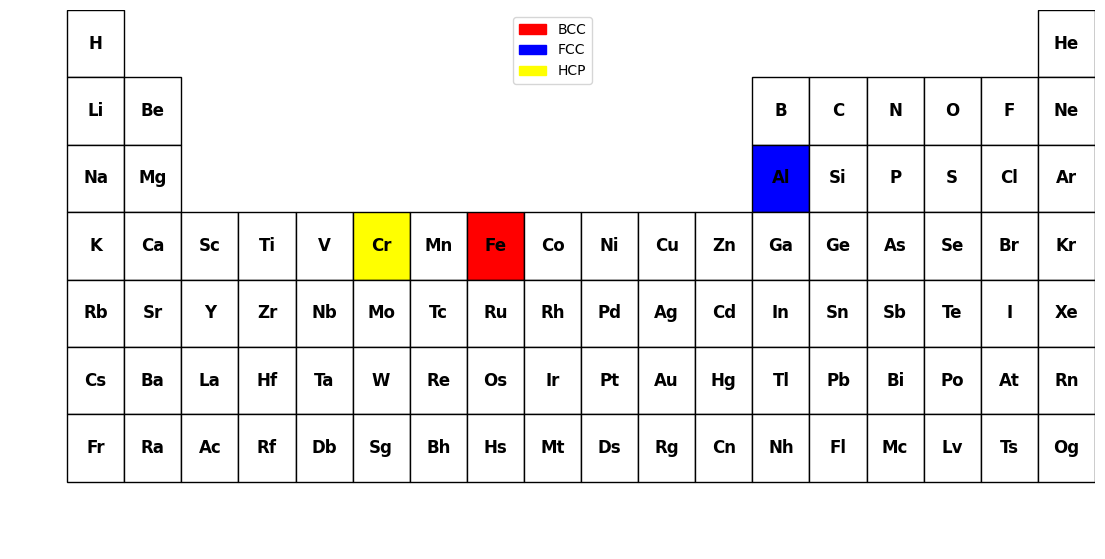

In [25]:
import matplotlib.pyplot as plt
from mendeleev import element

def plot_elements_on_periodic_table(elements):
    """
    Plot all elements on the periodic table with specified colors for their phase types.
    
    Args:
    - elements (dict): Dictionary with element symbols as keys and phase types as values.
                      Phase types represent the phase type of the elements in the HEAs.
    
    """
    # Define a color map for phase types
    phase_colors = {
        'BCC': 'red',
        'FCC': 'blue',
        'HCP': 'yellow',
        # Add more phase types and their colors as needed
    }

    fig, ax = plt.subplots(figsize=(14, 7))

    # Fetching all the elements
    all_elements = [element(i) for i in range(1, 119)]

    # Iterate over all elements and draw squares
    for el in all_elements:
        # Skip elements without a defined group_id
        if el.group_id is None:
            continue

        phase = elements.get(el.symbol, None) # get the phase type for the element if available, otherwise default to None
        color = phase_colors.get(phase, 'white') # use the color from the color map if available, otherwise default to white
        rect = plt.Rectangle([el.group_id, -el.period], 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        ax.text(el.group_id + 0.5, -el.period + 0.5, el.symbol, ha='center', va='center', fontsize=12, weight='bold')

    # Create legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=phase_colors[phase]) for phase in phase_colors]
    ax.legend(handles, phase_colors.keys(), loc='upper center')
    
    ax.set_xlim(0, 19)
    ax.set_ylim(-8, 0)
    ax.axis('off')
    
    plt.show()

# Example usage:
# Here you specify elements and their respective phase types in the HEAs.
# For instance, 'Fe' is of phase type 'BCC', while 'Al' is 'FCC'.
elements = {
    'Fe': 'BCC',
    'Al': 'FCC',
    'Cr': 'HCP',
    # Add more elements and their respective phase types as needed
}

plot_elements_on_periodic_table(elements)

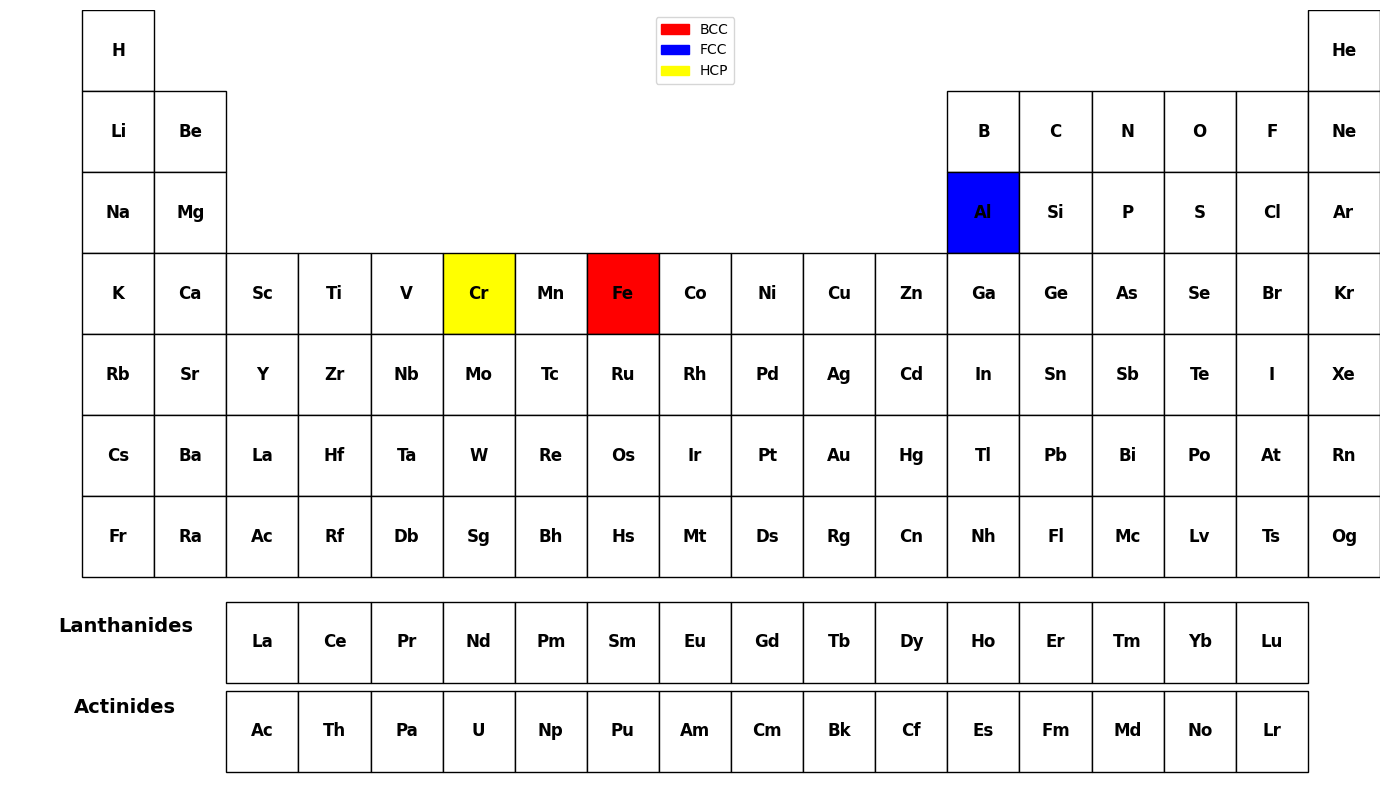

In [39]:
import matplotlib.pyplot as plt
from mendeleev import element

def plot_elements_on_periodic_table(elements):
    """
    Plot all elements on the periodic table with specified colors for their phase types.
    
    Args:
    - elements (dict): Dictionary with element symbols as keys and phase types as values.
                      Phase types represent the phase type of the elements in the HEAs.
    
    """
    # Define a color map for phase types
    phase_colors = {
        'BCC': 'red',
        'FCC': 'blue',
        'HCP': 'yellow',
        # Add more phase types and their colors as needed
    }

    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Fetching all the elements
    all_elements = [element(i) for i in range(1, 119)]
    
    # Function to plot individual elements
    def plot_element(el, group_id=None, y_offset=0):
        if group_id is None:
            group_id = el.group_id
        phase = elements.get(el.symbol, None)
        color = phase_colors.get(phase, 'white')
        rect = plt.Rectangle([group_id, -el.period - y_offset], 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        ax.text(group_id + 0.5, -el.period - y_offset + 0.5, el.symbol, ha='center', va='center', fontsize=12, weight='bold')
    
    # Iterate over all elements and draw squares
    for el in all_elements:
        if el.group_id is not None:
            plot_element(el)
    
    # Add Lanthanides and Actinides
    for i, el_num in enumerate(range(57, 72)):
        el = element(el_num)
        plot_element(el, group_id=i+3, y_offset=2.3)
        
    for i, el_num in enumerate(range(89, 104)):
        el = element(el_num)
        plot_element(el, group_id=i+3, y_offset=2.4)

    ax.text(1.6, -7.6, 'Lanthanides', ha='center', va='center', fontsize=14, weight='bold')
    ax.text(1.6, -8.6, 'Actinides', ha='center', va='center', fontsize=14, weight='bold')
    
    # Create legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=phase_colors[phase]) for phase in phase_colors]
    ax.legend(handles, phase_colors.keys(), loc='upper center')
    
    ax.set_xlim(0, 19)
    ax.set_ylim(-9.5, 0)
    ax.axis('off')

    plt.tight_layout()
    plt.savefig("periodic_table.png", dpi=500)
    
    plt.show()

# Example usage:
# Here you specify elements and their respective phase types in the HEAs.
# For instance, 'Fe' is of phase type 'BCC', while 'Al' is 'FCC'.
elements = {
    'Fe': 'BCC',
    'Al': 'FCC',
    'Cr': 'HCP',
    # Add more elements and their respective phase types as needed
}

plot_elements_on_periodic_table(elements)

In [46]:
from mendeleev import element

def get_crystallographic_info(elements):
    """
    Get the crystallographic information for a list of elements.
    
    Args:
    - elements (list): List of element symbols.
    
    Returns:
    - dict: Dictionary with element symbols as keys and crystallographic info as values.
    """
    info = {}
    for el in elements:
        element_data = element(el)
        info[el] = element_data.lattice_structure
    return info

# Example usage:
elements_used_in_HEA = ['Fe', 'Al', 'Cr', 'Ni', 'Ti']

phases = get_crystallographic_info(elements_used_in_HEA)

print(phases)

{'Fe': 'BCC', 'Al': 'FCC', 'Cr': 'BCC', 'Ni': 'FCC', 'Ti': 'HEX'}


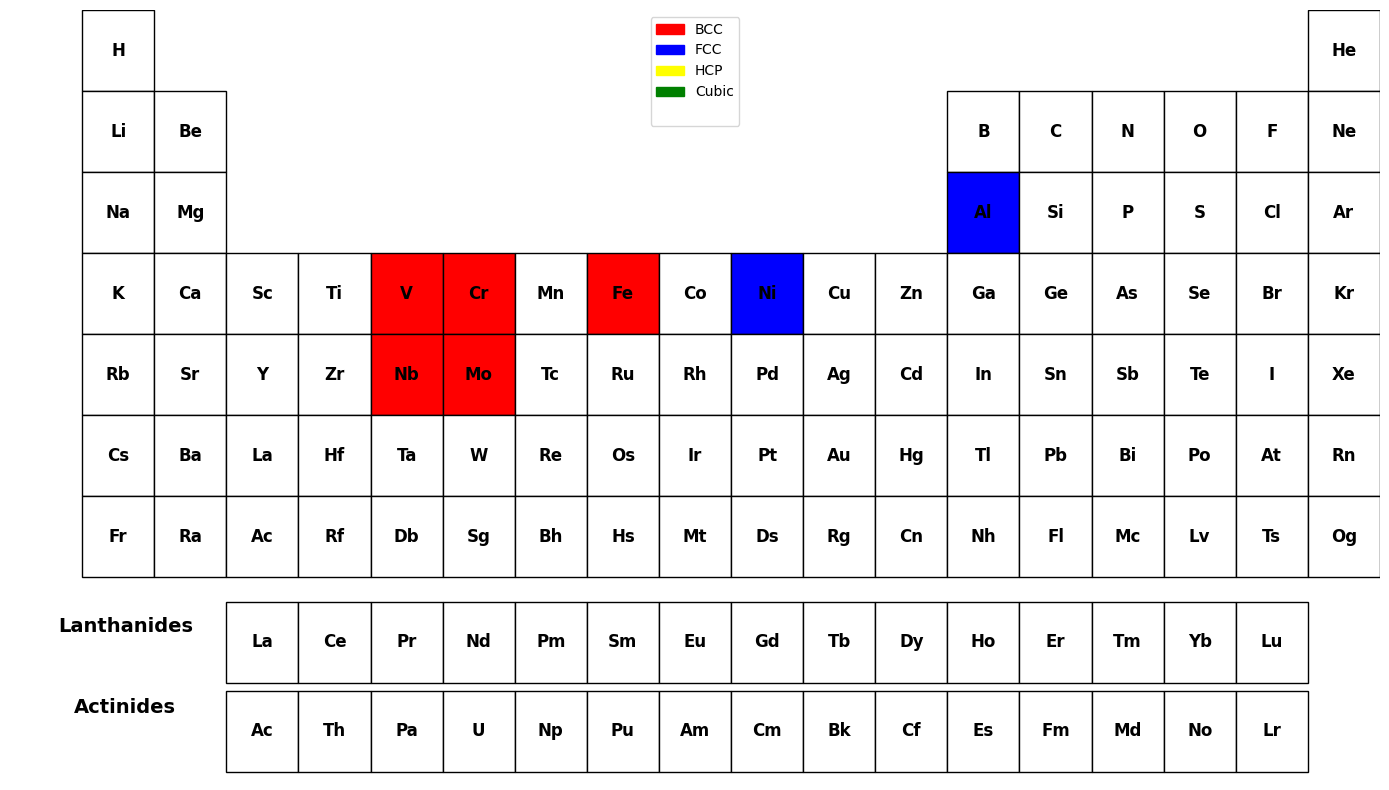

In [48]:
import matplotlib.pyplot as plt
from mendeleev import element

def plot_elements_on_periodic_table(elements):
    """
    Plot all elements on the periodic table with specified colors for their phase types.
    
    Args:
    - elements (dict): Dictionary with element symbols as keys and phase types as values.
                      Phase types represent the phase type of the elements in the HEAs.
    
    """
    # Define a color map for phase types
    phase_colors = {
        'BCC': 'red',
        'FCC': 'blue',
        'HCP': 'yellow',
        'Cubic': 'green',
        None: 'white'
        # Add more phase types and their colors as needed
    }

    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Fetching all the elements
    all_elements = [element(i) for i in range(1, 119)]
    
    # Function to plot individual elements
    def plot_element(el, group_id=None, y_offset=0):
        if group_id is None:
            group_id = el.group_id
        phase = elements.get(el.symbol, None)
        color = phase_colors.get(phase, 'white')
        rect = plt.Rectangle([group_id, -el.period - y_offset], 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        ax.text(group_id + 0.5, -el.period - y_offset + 0.5, el.symbol, ha='center', va='center', fontsize=12, weight='bold')
    
    # Iterate over all elements and draw squares
    for el in all_elements:
        if el.group_id is not None:
            plot_element(el)
    
    # Add Lanthanides and Actinides
    for i, el_num in enumerate(range(57, 72)):
        el = element(el_num)
        plot_element(el, group_id=i+3, y_offset=2.3)
        
    for i, el_num in enumerate(range(89, 104)):
        el = element(el_num)
        plot_element(el, group_id=i+3, y_offset=2.4)

    ax.text(1.6, -7.6, 'Lanthanides', ha='center', va='center', fontsize=14, weight='bold')
    ax.text(1.6, -8.6, 'Actinides', ha='center', va='center', fontsize=14, weight='bold')
    
    # Create legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=phase_colors[phase]) for phase in phase_colors]
    ax.legend(handles, phase_colors.keys(), loc='upper center')
    
    ax.set_xlim(0, 19)
    ax.set_ylim(-9.5, 0)
    ax.axis('off')

    plt.tight_layout()
    plt.savefig("periodic_table.png", dpi=500)
    
    plt.show()


elements_used_in_HEA = ['Fe', 'Al', 'Cr', 'Ni', 'Ti', 'Mo', 'Nb', 'V', 'Zr']
phases = get_crystallographic_info(elements_used_in_HEA)

plot_elements_on_periodic_table(phases)

In [67]:
elements_used_in_HEA = ['Mg', 'Al', 'Si', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As',
                        'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te',
                        'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Pb', 'Bi']

all_phases = get_crystallographic_info(elements_used_in_HEA)

unique_values = set(all_phases.values())
print(unique_values)

{'TET', 'RHL', 'CUB', 'DIA', 'FCC', 'HEX', 'ORC', 'BCC'}


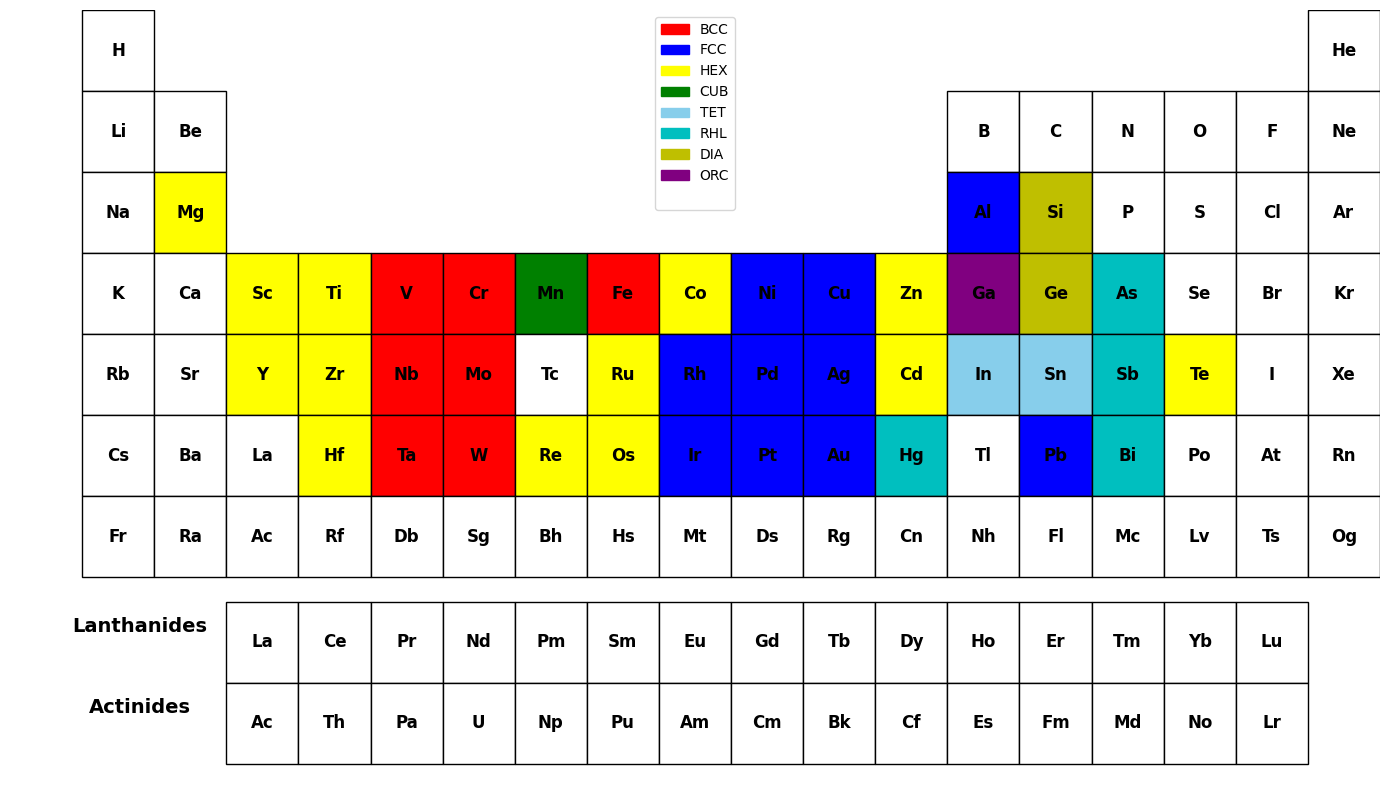

In [71]:
import matplotlib.pyplot as plt
from mendeleev import element

def plot_elements_on_periodic_table(elements):
    """
    Plot all elements on the periodic table with specified colors for their phase types.
    
    Args:
    - elements (dict): Dictionary with element symbols as keys and phase types as values.
                      Phase types represent the phase type of the elements in the HEAs.
    
    """
    # Define a color map for phase types
    phase_colors = {
        'BCC': 'red',
        'FCC': 'blue',
        'HEX': 'yellow',
        'CUB': 'green',
        'TET': 'skyblue',
        'RHL': 'c',
        'DIA': 'y',
        'ORC': 'purple',
        None: 'white'
        # Add more phase types and their colors as needed
    }

    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Fetching all the elements
    all_elements = [element(i) for i in range(1, 119)]
    
    # Function to plot individual elements
    def plot_element(el, group_id=None, y_offset=0):
        if group_id is None:
            group_id = el.group_id
        phase = elements.get(el.symbol, None)
        color = phase_colors.get(phase, 'white')
        rect = plt.Rectangle([group_id, -el.period - y_offset], 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        ax.text(group_id + 0.5, -el.period - y_offset + 0.5, el.symbol, ha='center', va='center', fontsize=12, weight='bold')
    
    # Iterate over all elements and draw squares
    for el in all_elements:
        if el.group_id is not None:
            plot_element(el)
    
    # Add Lanthanides and Actinides
    for i, el_num in enumerate(range(57, 72)):
        el = element(el_num)
        plot_element(el, group_id=i+3, y_offset=2.30)
        
    for i, el_num in enumerate(range(89, 104)):
        el = element(el_num)
        plot_element(el, group_id=i+3, y_offset=2.30)

    ax.text(1.8, -7.6, 'Lanthanides', ha='center', va='center', fontsize=14, weight='bold')
    ax.text(1.8, -8.6, 'Actinides', ha='center', va='center', fontsize=14, weight='bold')
    
    # Create legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=phase_colors[phase]) for phase in phase_colors]
    ax.legend(handles, phase_colors.keys(), loc='upper center')
    
    ax.set_xlim(0, 19)
    ax.set_ylim(-9.5, 0)
    ax.axis('off')

    plt.tight_layout()
    plt.savefig("periodic_table.png", dpi=500)
    
    plt.show()


elements_phases = get_crystallographic_info(elements_used_in_HEA)

plot_elements_on_periodic_table(elements_phases)